# 유튜브 데이터 분석 - 2조 (김현경, 이수연, 최수연)

유튜브 인기 동영상(Trending-Videos) 데이터 ( https://www.kaggle.com/datasnaek/youtube-new ) 중 KR, US 데이터 활용 <br>

“To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year"

** 궁금한 것
1. 인기 동영상의 기준 (한국, 미국 데이터 통합하여 알아보기) <br>
(1) views, likes 통계값 <br>
(2) 인기동영상 진입에 걸리는 일수 <br>
(3) 업로드 월별 비교 <br>
<br>
2. 한국, 미국 인기 동영상의 전반적 상황 (한국, 미국 데이터 비교하기) <br>
(1) 비호감 영상 (싫어요 중심 비교) <br>
(2) 인기 채널 <br>
(3) 인기 카테고리

# 데이터 확인 및 전처리

In [1]:
from pandas import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
#한국 데이터 불러오기
input_fd = open('./youtube-new/KRvideos.csv',errors = 'backslashreplace',encoding='utf-8')
KRvideos = pd.read_csv(input_fd)
KR = pd.DataFrame(KRvideos)

#미국 데이터 불러오기
USvideos = pd.read_csv('./youtube-new/USvideos.csv')
US = pd.DataFrame(USvideos)

In [3]:
#한국 데이터 확인
KR.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...


In [4]:
#미국 데이터 확인
US.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
KR["description"] = KR["description"].fillna(value="") #null한 자료 없애기
US["description"] = US["description"].fillna(value="") #null한 자료 없애기

In [6]:
print(KR.dtypes)

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object


In [7]:
#나라 변수 생성
KR["country"] = "KR"
US["country"] = "US"

In [8]:
KRUS = pd.concat([KR, US]) # 한국, 미국 데이터 합치기

# 1. 인기 동영상이 되는 기준은 무엇일까?

<b> <font size=3.5> (1) 인기 동영상의 통계값 </font> </b>

In [9]:
KRUS.describe()

,category_id,views,likes,dislikes,comment_count
count,75516.000000,7.551600e+04,7.551600e+04,7.551600e+04,7.551600e+04
mean,20.505813,1.474667e+06,4.584982e+04,2.259298e+03,5.507436e+03
std,7.196833,5.768958e+06,1.887748e+05,2.335561e+04,3.133164e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,8.422525e+04,1.034000e+03,5.200000e+01,2.250000e+02
50%,24.000000,2.848595e+05,4.987000e+03,2.120000e+02,8.280000e+02
75%,25.000000,9.750578e+05,2.405450e+04,8.872500e+02,2.883000e+03
max,44.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [10]:
#깔끔하게 정리하면
def summary_numeric(col):  
    print(col)
    print("평균 {:>15}".format(format(KRUS[col].mean(), ",.0f")))
    print("최소 {:>15}".format(format(KRUS[col].min(), ",.0f")))
    print("중앙 {:>15}".format(format(KRUS[col].median(), ",.0f")))
    print("최대 {:>15}".format(format(KRUS[col].max(), ",.0f")))

summary_numeric("views") 
summary_numeric("likes")
summary_numeric("dislikes")
summary_numeric("comment_count")

views
평균       1,474,667
최소             549
중앙         284,860
최대     225,211,923
likes
평균          45,850
최소               0
중앙           4,987
최대       5,613,827
dislikes
평균           2,259
최소               0
중앙             212
최대       1,674,420
comment_count
평균           5,507
최소               0
중앙             828
최대       1,361,580


<font size=3.8>* 즉, 인기 영상은 평균 1500만 조회수, 평균 4만 5천 좋아요, 평균 5500 개의 댓글 수를 기록한 영상이다. </font>

<b> <font size=3.5> (2) 인기 동영상 진입에 걸리는 일수 </font> </b>

In [11]:
import datetime

In [12]:
# 영상 업로드 일자(publish_time) YYYY-MM-DD 형식으로 바꾸기
KRUS['publish_time'] =  pd.to_datetime(KRUS['publish_time'])
KRUS["publish_time"] = KRUS["publish_time"].apply(lambda x : x.date()) #시간은 제거하고 YYYY-MM-DD 형식으로 표시
KRUS["publish_time"] = pd.to_datetime(KRUS["publish_time"])
KRUS['publish_time']

0       2017-11-13
1       2017-11-13
2       2017-11-11
3       2017-11-12
4       2017-11-13
           ...    
40944   2018-05-18
40945   2018-05-18
40946   2018-05-18
40947   2018-05-17
40948   2018-05-17
Name: publish_time, Length: 75516, dtype: datetime64[ns]

In [13]:
# 인기 영상 진입 일자(trending_date) YYYY-MM-DD 형식으로 바꾸기
KRUS["trending_date"] = pd.to_datetime(KRUS["trending_date"], format = "%y.%d.%m")
KRUS["trending_date"]

0       2017-11-14
1       2017-11-14
2       2017-11-14
3       2017-11-14
4       2017-11-14
           ...    
40944   2018-06-14
40945   2018-06-14
40946   2018-06-14
40947   2018-06-14
40948   2018-06-14
Name: trending_date, Length: 75516, dtype: datetime64[ns]

In [14]:
# 동영상 게시 후 인기영상이 되는 데까지 걸리는 기간 구하기
KRUS["trending-publish"] = KRUS["trending_date"] - KRUS["publish_time"]
KRUS["trending-publish"].head(10)

0   1 days
1   1 days
2   3 days
3   2 days
4   1 days
5   2 days
6   2 days
7   2 days
8   2 days
9   1 days
Name: trending-publish, dtype: timedelta64[ns]

In [15]:
KRUS["trending-publish"].describe()

count                       75516
mean      10 days 07:52:21.204512
std      109 days 07:26:40.495109
min               0 days 00:00:00
25%               2 days 00:00:00
50%               3 days 00:00:00
75%               6 days 00:00:00
max            4215 days 00:00:00
Name: trending-publish, dtype: object

<font size=3.8> * 역주행하는 영상 등 일부 이상치를 제외하면 인기 영상이 되는 결정적인 기간은 2일에서 6일이라고 볼 수 있다. 즉, 인기 영상은 대부분 2~6일 안에 화제가 된 영상들이다. </font>

<b> <font size=3.5> (3) 업로드 월별 비교 </font> </b>

In [16]:
# publish_time에서 year만 추출하기
KRUS['publish_year'] = KRUS['publish_time'].dt.year
KRUS['publish_year']

0        2017
1        2017
2        2017
3        2017
4        2017
         ... 
40944    2018
40945    2018
40946    2018
40947    2018
40948    2018
Name: publish_year, Length: 75516, dtype: int64

In [17]:
# publish_time에서 month만 추출하기
KRUS['publish_month'] = KRUS['publish_time'].dt.month
KRUS['publish_month']

0        11
1        11
2        11
3        11
4        11
         ..
40944     5
40945     5
40946     5
40947     5
40948     5
Name: publish_month, Length: 75516, dtype: int64

In [18]:
# 연도별 인기 영상의 총 조회수
year_viewsum = KRUS.groupby(['publish_year']).views.sum()
year_viewsum

publish_year
2006         258506
2008         627600
2009         342566
2010        1006586
2011        1385668
2012        1630184
2013        1198995
2014        2814324
2015        3344903
2016        5330334
2017    17666324052
2018    93676658747
Name: views, dtype: int64

<font size=3.8> * 2006년부터 2018년까지 데이터가 있으며 시간이 갈수록 조회수가 증가하는 추세를 보인다. 특히 2017년부터 조회수가 폭증한다. 하지만 오래 전일수록 missing data가 많다는 점도 고려해야한다.</font>

In [19]:
# 월별 평균 조회수
meanview_of_yearmonth=KRUS.groupby(['publish_year','publish_month']).views.mean()
print(meanview_of_yearmonth)

publish_year  publish_month
2006          7                2.585060e+05
2008          4                5.006425e+04
              6                8.683025e+04
              8                2.667400e+04
2009          3                1.542900e+04
                                   ...     
2018          2                1.001543e+06
              3                1.297452e+06
              4                2.380266e+06
              5                2.966923e+06
              6                1.119022e+06
Name: views, Length: 67, dtype: float64


In [20]:
# 인기 영상의 평균 조회수가 가장 많은 달
meanview_of_yearmonth.nlargest(10)

publish_year  publish_month
2018          5                2.966923e+06
              4                2.380266e+06
              3                1.297452e+06
              6                1.119022e+06
              2                1.001543e+06
2017          11               9.753666e+05
              12               9.109745e+05
2016          2                8.092263e+05
2018          1                7.818322e+05
2017          9                5.565971e+05
Name: views, dtype: float64

In [21]:
# 월별 평균 좋아요 수
meanlike_of_yearmonth=KRUS.groupby(['publish_year','publish_month']).likes.mean()
print(meanlike_of_yearmonth)

publish_year  publish_month
2006          7                  459.000000
2008          4                   46.000000
              6                  469.000000
              8                   78.333333
2009          3                   33.500000
                                   ...     
2018          2                27014.854184
              3                42494.448515
              4                65989.207551
              5                89349.594710
              6                44864.217781
Name: likes, Length: 67, dtype: float64


In [22]:
#인기 영상의 평균 좋아요 수가 가장 많은 달
meanlike_of_yearmonth.nlargest(10)

publish_year  publish_month
2018          5                89349.594710
              4                65989.207551
              6                44864.217781
              3                42494.448515
2017          11               34798.215432
              12               30242.630983
2018          1                28416.924627
              2                27014.854184
2017          9                14371.533333
2015          10                6857.625000
Name: likes, dtype: float64

# 2. 한국, 미국 인기 동영상의 전반적 상황 (한국, 미국 데이터 비교)

<b> <font size=3.5> (1) 한국, 미국의 비호감 영상 </font> </b>

1-1. 한국

In [23]:
# 싫어요수 / 조회수 변수 생성
KR["dislikes_views_rate"] = KR["dislikes"] / KR["views"]

In [24]:
# 싫어요/조회수 rate 내림차순으로 정렬
KR_rate_sort = KR.sort_values(["dislikes_views_rate"], ascending=[False])
KR_rate_sort = KR_rate_sort.reset_index(drop=True)

In [25]:
#top5 추출하기
KR_rate_top5 = KR_rate_sort.iloc[0:5, ]
KR_rate_top5.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,dislikes_views_rate
0,_4XMgqNMwJs,17.20.12,12.18] 12.19] 스크림팀 갓건배 오늘 11시 시작합니다!!!! 오버워치 ...,갓건배,20,2017-12-19T18:51:12.000Z,[none],9056,320,387,21,https://i.ytimg.com/vi/_4XMgqNMwJs/default.jpg,False,False,False,,KR,0.042734
1,a5jpM7biXp4,18.07.01,1.6] 슬라임 개부자 갓건배방송. 오버워치 부캐 배치봅니다. 그마갑니다. 여러분들...,갓건배,20,2018-01-07T07:39:37.000Z,[none],22978,656,912,278,https://i.ytimg.com/vi/a5jpM7biXp4/default.jpg,False,False,False,,KR,0.039690
2,rzUpGAmhgPc,17.28.11,Chi Pu | EM SAI RỒI ANH XIN LỖI EM ĐI (#ESRAXL...,Chi Pu Official,24,2017-11-26T13:00:40.000Z,"Chi Pu|""em sai rồi anh xin lỗi em đi""|""em sai ...",2354772,89525,72335,26431,https://i.ytimg.com/vi/rzUpGAmhgPc/default.jpg,False,False,False,EM SAI RỒI ANH XIN LỖI EM ĐI (#ESRAXLED) - OFF...,KR,0.030718
3,M_Mtb-XR4Us,18.16.01,1.14] 오버워치 부캐(남친계정대리중)참교육방송 및 11시 스크림팀!!! 오버워...,갓건배,20,2018-01-15T00:42:44.000Z,[none],20526,555,602,103,https://i.ytimg.com/vi/M_Mtb-XR4Us/default.jpg,False,False,False,,KR,0.029329
4,VWH6NGjrG4Q,17.21.11,[변희재의 시사폭격] 조원진과 김경혜의 대한애국당 사망선고일! 그래도 희망은 잃지 말자,미디어워치 TV,24,2017-11-20T12:32:20.000Z,"#조원진|""#김경혜""|""#대한애국당""|""#조원진 김경혜""|""#조원진 대표""|""#김경...",42283,1456,1145,1184,https://i.ytimg.com/vi/VWH6NGjrG4Q/default.jpg,False,False,False,◆시사폭격 258회◆,KR,0.027079


<font size=3.8> * 한국에서 조회수 대비 싫어요가 많은 인기 영상은 갓건배의 영상이 많으며, 싫어요/조회수 rate은 0.03~0.04 정도이다.</font>

단편적인 싫어요 수와 싫어요/조회수 rate의 차이를 비교하면

In [26]:
#한국 싫어요수 top5 video와 rate top5 video의 비교
dislikes_top5_KR = KR.sort_values(by='dislikes', ascending = [False])
dislikes_top5_KR.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,dislikes_views_rate
4856,FlsCjmMhFmw,17.11.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113876217,2811223,1470388,787174,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",KR,0.012912
4678,FlsCjmMhFmw,17.10.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656686,1353663,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",KR,0.013414
4453,FlsCjmMhFmw,17.09.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",75969469,2251837,1127817,827771,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",KR,0.014846
4244,FlsCjmMhFmw,17.08.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",52611730,1891832,884965,702790,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",KR,0.016821
30844,7C2z4GqqS5E,18.24.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",87430865,5150839,172570,1142274,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,KR,0.001974


<font size=3.8>* 한국의 싫어요수 top5 비디오와 dislike rate top5 비디오를 비교했을때 일치하는 것이 하나도 없다. 싫어요 수 top5의 rate는 0.001~0.01 로 dislike rate top5와 비교했을때 낮은 수준이다.</font>

1-2. 미국

In [27]:
# 싫어요수 / 조회수 변수 생성
US["dislikes_views_rate"] = US["dislikes"] / US["views"]

In [28]:
# 싫어요/조회수 rate 내림차순으로 정렬
US_rate_sort = US.sort_values(["dislikes_views_rate"], ascending=[False])
US_rate_sort = US_rate_sort.reset_index(drop=True)

In [29]:
#top5 추출하기
US_rate_top5 = US_rate_sort.iloc[0:5, ]
US_rate_top5.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,dislikes_views_rate
0,LFhT6H6pRWg,17.19.12,PSA from Chairman of the FCC Ajit Pai,Daily Caller,22,2017-12-13T22:52:57.000Z,"thedc|""dc""|""washington dc""|""washington""|""the d...",1142585,9100,218841,28013,https://i.ytimg.com/vi/LFhT6H6pRWg/default.jpg,False,False,False,Ajit Pai has been at the heart of the net neut...,US,0.191531
1,LFhT6H6pRWg,17.20.12,PSA from Chairman of the FCC Ajit Pai,Daily Caller,22,2017-12-13T22:52:57.000Z,"thedc|""dc""|""washington dc""|""washington""|""the d...",1179072,9368,224152,29063,https://i.ytimg.com/vi/LFhT6H6pRWg/default.jpg,False,False,False,Ajit Pai has been at the heart of the net neut...,US,0.190109
2,LFhT6H6pRWg,17.21.12,PSA from Chairman of the FCC Ajit Pai,Daily Caller,22,2017-12-13T22:52:57.000Z,"thedc|""dc""|""washington dc""|""washington""|""the d...",1205682,9572,228426,29634,https://i.ytimg.com/vi/LFhT6H6pRWg/default.jpg,False,False,False,Ajit Pai has been at the heart of the net neut...,US,0.189458
3,GnGPAYvve1A,18.08.06,#ProudToCreate: Pride 2018,YouTube Spotlight,24,2018-06-07T19:08:51.000Z,"#Pride|""#ProudToCreate""|""#ProudToBe""|""#ProudTo...",597669,29781,71617,55110,https://i.ytimg.com/vi/GnGPAYvve1A/default.jpg,False,False,False,You don't just imagine a better future – you c...,US,0.119827
4,8d_202l55LU,17.15.12,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14T18:49:06.000Z,"fcc net neutrality|""breaking news video""|""vide...",985179,4870,110707,19843,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,US,0.112372


<font size=3.8> * 미국의 경우 Daily Caller 채널의 동영상이 많다. 확인해보니 우익의 뉴스를 전하는 채널이다. 싫어요/조회수 rate은 0.1 ~ 0.2 정도로 상당히 높은 수준이다. </font>

In [30]:
#미국 싫어요수 top5 video와 rate top5 video의 비교
dislikes_top5_US = US.sort_values(by='dislikes', ascending = [False])
dislikes_top5_US.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,dislikes_views_rate
11323,QwZT7T-TXT0,18.09.01,So Sorry.,Logan Paul Vlogs,24,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",37539570,1402578,1674420,1361580,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,,US,0.044604
6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",US,0.010999
11096,QwZT7T-TXT0,18.08.01,So Sorry.,Logan Paul Vlogs,24,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",35983135,1370845,1611043,1321281,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,,US,0.044772
5935,FlsCjmMhFmw,17.13.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014471,1602383,817582,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",US,0.011625
5699,FlsCjmMhFmw,17.12.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912702,1545015,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",US,0.012318


<font size=3.8> * 미국 역시 싫어요수 top5 비디오와 rate top5 비디오를 비교했을때 일치하는 것이 하나도 없었다. 싫어요수 top5의 rate는 0.01~0.04 수준이다. </font>

<b> <font size=3.5> (2) 한국, 미국의 인기 채널 top10 </font> </b>

2-1. 조회수 기준

In [31]:
# 한국
KR_top_views = KR.groupby('channel_title')['views'].max().sort_values(ascending=False)
KR_top10_views = KR_top_views.head(10)
KR_top10_views

channel_title
YouTube Spotlight              113876217
Marvel Entertainment            87450245
ibighit                         87430865
ChildishGambinoVEVO             73432600
Sony Pictures Entertainment     49185287
jypentertainment                42267579
Bruno Mars                      37728802
Kylie Jenner                    35832484
TaylorSwiftVEVO                 35218973
ArianaGrandeVevo                32331284
Name: views, dtype: int64

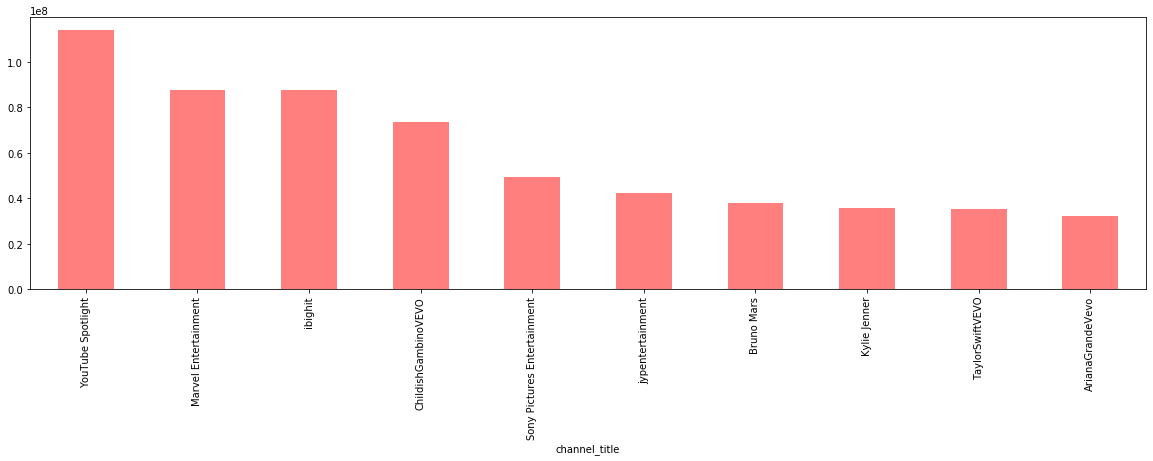

In [32]:
plt.rcParams['figure.figsize'] = [20, 5]
KR_top10_views.plot(kind="bar", color="red", alpha=0.5)

In [34]:
# 미국
US_top_views = US.groupby('channel_title')['views'].max().sort_values(ascending=False)
US_top10_views = US_top_views.head(10)
US_top10_views

channel_title
ChildishGambinoVEVO     225211923
YouTube Spotlight       149376127
ArianaGrandeVevo        148689896
BeckyGVEVO              139334502
ibighit                 123010920
TheWeekndVEVO           122544931
LuisFonsiVEVO           102012605
Cardi B                  94254507
Marvel Entertainment     91933007
MalumaVEVO               87264467
Name: views, dtype: int64

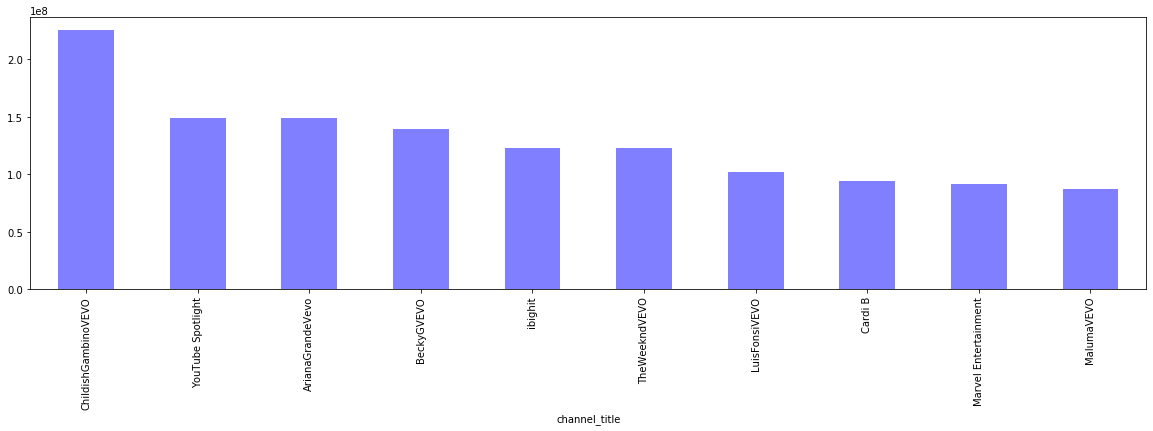

In [35]:
US_top10_views.plot(kind="bar", color="blue", alpha=0.5)

<font size=3.8> * 한국에서는 YouTube Spotlight, 미국에서는 ChildishGambinoVEVO 채널이 조회수 1위이다. 한국과 미국 모두 공통적으로 YouTube Spotlight, ibighit, Marvel Entertainment, ArianaGrandeVevo 가 조회순 인기채널 TOP10 내에 존재하고 있다. </font>

2-2. 좋아요 기준

In [36]:
# 한국
KR_top_likes = KR.groupby('channel_title')['likes'].max().sort_values(ascending=False)
KR_top10_likes = KR_top_likes.head(10)
KR_top10_likes

channel_title
ibighit                        5150839
YouTube Spotlight              2811223
Marvel Entertainment           2584675
ChildishGambinoVEVO            2478908
ArianaGrandeVevo               1890564
TaylorSwiftVEVO                1681449
Bruno Mars                     1629948
Maroon5VEVO                    1547857
DrakeVEVO                      1431554
Sony Pictures Entertainment    1204868
Name: likes, dtype: int64

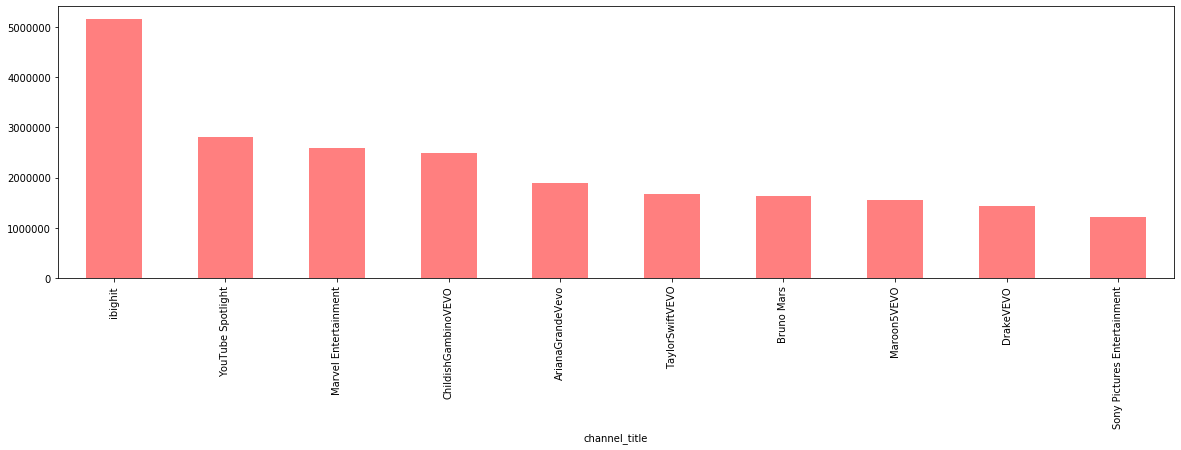

In [37]:
KR_top10_likes.plot(kind="bar", color="red", alpha=0.5)

In [38]:
# 미국
US_top_likes = US.groupby('channel_title')['likes'].max().sort_values(ascending=False)
US_top10_likes = US_top_likes.head(10)
US_top10_likes

channel_title
ibighit                 5613827
ChildishGambinoVEVO     5023450
ArianaGrandeVevo        3094021
YouTube Spotlight       3093544
Marvel Entertainment    2625661
Maroon5VEVO             2488565
LuisFonsiVEVO           2376636
David Dobrik            2032463
Logan Paul Vlogs        1988746
TaylorSwiftVEVO         1928392
Name: likes, dtype: int64

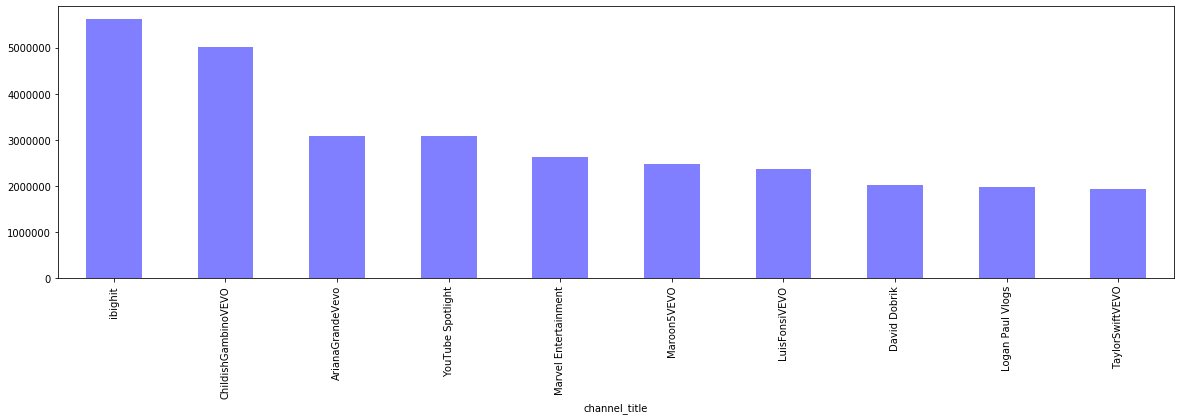

In [39]:
US_top10_likes.plot(kind="bar", color="blue", alpha=0.5)

<font size=3.8> ** 한국과 미국의 좋아요 1위 채널은 공통적으로 ibighit 라는 사실을 알 수 있다. 그 외에도 YouTube Spotlight, Marvel Entertainment, ArianaGrandeVevo, ChildishGambinoVEVO, TaylorSwiftVEVO 등이 한국과 미국의 좋아요순 인기채널 TOP10에 존재하고 있다.

** 앞서 본 조회수순 인기채널 TOP10과 좋아요순 인기채널 TOP10 을 통하여 알 수 있는 사실은, 나라가 다름에도 불구하고 인기가 많은 채널은 공통적으로 공유되고 있다는 점이다. 또한, 한국에서 미국 팝가수 채널들을 포함한 미국 채널들이 꽤 큰 관심을 받고 있다는 사실 또한 발견할 수 있었다.</font>

2-3. 인기 영상에 가장 많이 진입한 채널

In [40]:
# 한국 
# 채널이름을 그룹화 하여 count 적용
KR_popular_channel = KR.groupby('channel_title').count()

# 현재 채널마다 모든 열에 대해 유투브 인기 영상에 진입한 횟수가 기입되었기 때문에 임의의 열을 가져와 'count'라는 이름의 열로 재생성
KR_popular_channel['count'] = KR_popular_channel['trending_date']

# 생성한 count 열만 채널이름과 함께 가져오기
KR_popular_channel = KR_popular_channel.loc[:,['count']]

# 내림차순 정렬 (인기영상에 진입한 횟수 많은 순으로)
KR_popular_channel = KR_popular_channel.sort_values('count', ascending=False)

# top 10
KR_popular_channel_top10 = KR_popular_channel.iloc[:10]
KR_popular_channel_top10

,count
channel_title,
신의한수,222
정규재TV,219
도봉박홍기,218
보겸 TV,195
JTBC News,182
윤창중칼럼세상 TV,178
철구형 (CHULTUBE),167
영국남자 Korean Englishman,163
밴쯔,162


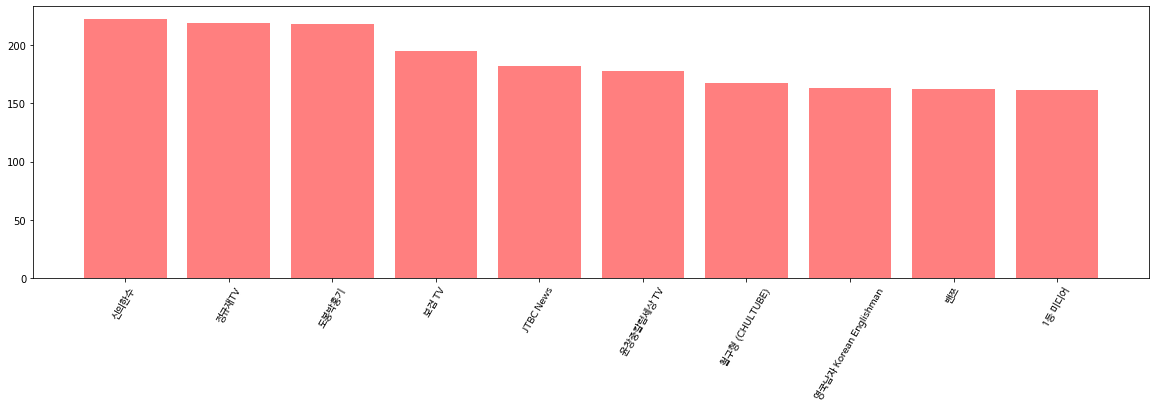

In [41]:
path = 'C:/WINDOWS/FONTS/NANUMBARUNGOTHIC.ttf'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = [20, 5]
fontprop = fm.FontProperties(fname=path)
plt.xticks(rotation=60, fontproperties=fontprop)
plt.bar(KR_popular_channel_top10.index, KR_popular_channel_top10['count'], color='red', alpha=0.5)
plt.show()

In [42]:
# 미국
US_popular_channel = US.groupby('channel_title').count().sort_values('trending_date', ascending=False)
US_popular_channel['count'] = US_popular_channel['trending_date']
US_popular_channel = US_popular_channel.loc[:,['count']]
US_popular_channel = US_popular_channel.sort_values('count', ascending=False)

# top 10
US_popular_channel_top10 = US_popular_channel.iloc[:10]
US_popular_channel_top10

,count
channel_title,
ESPN,203
The Tonight Show Starring Jimmy Fallon,197
Vox,193
Netflix,193
TheEllenShow,193
The Late Show with Stephen Colbert,187
Jimmy Kimmel Live,186
Late Night with Seth Meyers,183
Screen Junkies,182


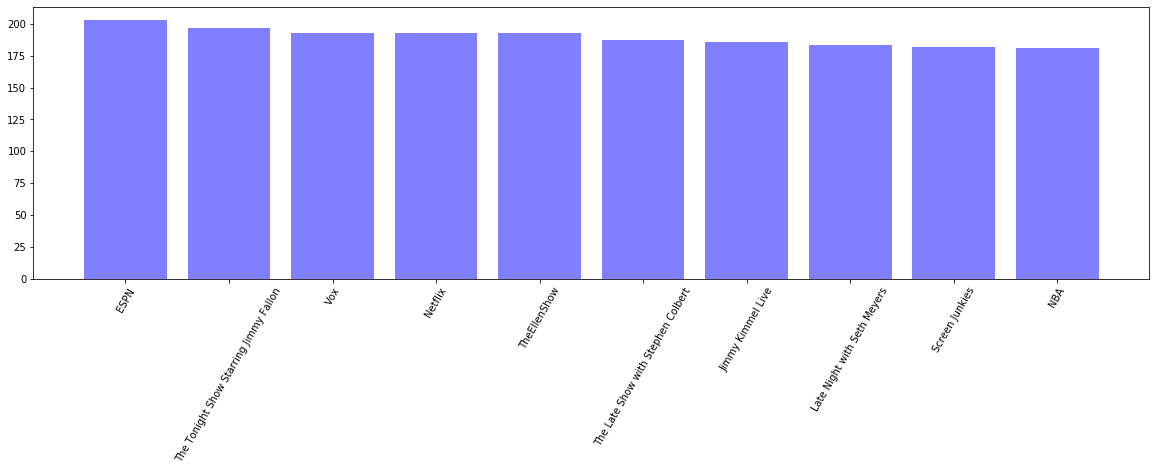

In [43]:
plt.rcParams['figure.figsize'] = [20, 5]
plt.xticks(rotation=60)
plt.bar(US_popular_channel_top10.index, US_popular_channel_top10['count'], color='blue', alpha=0.5)
plt.show()

<b> <font size=3.5> (3) 한국, 미국의 인기 카테고리 </font> </b>

3-1. 카테고리별 조회수,좋아요수,댓글수 비교

In [44]:
category_id_name={2 : 'Autos & Vehicles',
1 : 'Film & Animation',
10 : 'Music',
15 : 'Pets & Animals',
17 : 'Sports',
18 : 'Short Movies',
19 : 'Travel & Events',
20 : 'Gaming',
21 : 'Videoblogging',
22 : 'People & Blogs',
23 : 'Comedy',
24 : 'Entertainment',
25 : 'News & Politics',
26 : 'Howto & Style',
27 : 'Education',
28 : 'Science & Technology',
29 : 'Nonprofits & Activism',
30 : 'Movies',
31 : 'Anime/Animation',
32 : 'Action/Adventure',
33 : 'Classics',
34 : 'Comedy',
35 : 'Documentary',
36 : 'Drama',
37 : 'Family',
38 : 'Foreign',
39 : 'Horror',
40 : 'Sci-Fi/Fantasy',
41 : 'Thriller',
42 : 'Shorts',
43 : 'Shows',
44 : 'Trailers'} #카테고리명을 가져옴

In [45]:
#카테고리명을 리스트화함
category_id_list = pd.DataFrame(list(category_id_name.items()), columns=['category_id', 'category_name'])
print(category_id_list)

    category_id          category_name
0             2       Autos & Vehicles
1             1       Film & Animation
2            10                  Music
3            15         Pets & Animals
4            17                 Sports
5            18           Short Movies
6            19        Travel & Events
7            20                 Gaming
8            21          Videoblogging
9            22         People & Blogs
10           23                 Comedy
11           24          Entertainment
12           25        News & Politics
13           26          Howto & Style
14           27              Education
15           28   Science & Technology
16           29  Nonprofits & Activism
17           30                 Movies
18           31        Anime/Animation
19           32       Action/Adventure
20           33               Classics
21           34                 Comedy
22           35            Documentary
23           36                  Drama
24           37          

In [46]:
#실제 데이터와 카테고리명을 연결한 데이터를 생성
KR_with_cat_name = pd.merge(KR,category_id_list)
US_with_cat_name = pd.merge(US,category_id_list)

In [47]:
#카테고리별로 그룹화한뒤 count 해보기
KR_cat_group = KR_with_cat_name.groupby("category_name")
KR_cat_group.size()

category_name
Autos & Vehicles          120
Comedy                   2056
Education                 486
Entertainment            8955
Film & Animation         2200
Gaming                   1392
Howto & Style             558
Music                    1825
News & Politics          7582
Nonprofits & Activism     288
People & Blogs           7056
Pets & Animals            735
Science & Technology      115
Shows                     165
Sports                    936
Trailers                    2
Travel & Events            96
dtype: int64

* Entertainment > News&Politics > People&Blogs 가 가장 많은 것으로 나타났다. Trailers가 가장 적은 것으로 나타났다.

In [48]:
#카테고리별 좋아요수 평균 분포
KR_cat_likes = KR_with_cat_name.groupby("category_name").likes.agg([min,max,np.mean])
print(KR_cat_likes.sort_values(["mean"]))

                       min      max           mean
category_name                                     
Trailers                 3        3       3.000000
Shows                   21     2617     435.151515
Nonprofits & Activism    0     7133     924.333333
Autos & Vehicles        12    11905    1267.125000
News & Politics          0    46626    1834.867449
Travel & Events          0    21698    1850.531250
Education                0    21276    2299.668724
People & Blogs           0   348162    3022.985402
Pets & Animals          36    19418    4414.374150
Sports                   0   784294    4481.721154
Comedy                   0   317509    6376.857004
Howto & Style            0   151277    6476.512545
Gaming                   0   258720    7030.969109
Film & Animation         0   526577    7496.784545
Entertainment            0  2811223    9853.064768
Science & Technology     0   393116   46109.139130
Music                    0  5150839  131638.056986


* Trailers 카테고리의 좋아요수 평균이 가장 작았고, Music 카테고리의 좋아요수 평균이 가장 컸다.

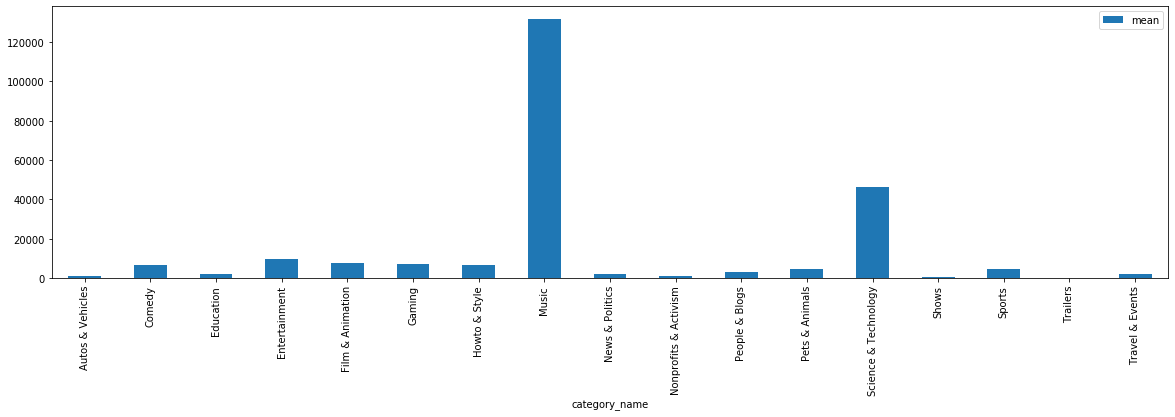

In [49]:
#그래프
KR_cat_mean1= pd.DataFrame(KR_cat_likes['mean'])
KR_cat_mean1.plot.bar()

* Music과 Science&Technology가 평균적으로 가장 좋아요수가 많았다.

In [50]:
#카테고리별 조회수 평균 분포
KR_cat_views = KR_with_cat_name.groupby("category_name").views.agg([min,max,np.mean])
print(KR_cat_views.sort_values(["mean"]))

                         min        max          mean
category_name                                        
Trailers               13454      19845  1.664950e+04
Nonprofits & Activism   4302    2510664  6.316461e+04
Shows                   8842    1017890  1.062983e+05
Autos & Vehicles        6009     889086  1.198672e+05
Education               7745    1604579  1.511617e+05
News & Politics         3124    5354566  1.546775e+05
Pets & Animals          7126    1873207  2.022284e+05
People & Blogs          2050   35832484  2.098027e+05
Travel & Events         6829    2831980  2.405090e+05
Gaming                  3954   13418844  2.814424e+05
Howto & Style           5847   13432309  3.146176e+05
Comedy                  6587    6893446  3.598452e+05
Entertainment           2919  113876217  5.103813e+05
Film & Animation        4820   26670001  5.440154e+05
Sports                  6340   17228602  5.987503e+05
Music                   4460   87430865  2.080543e+06
Science & Technology    8169

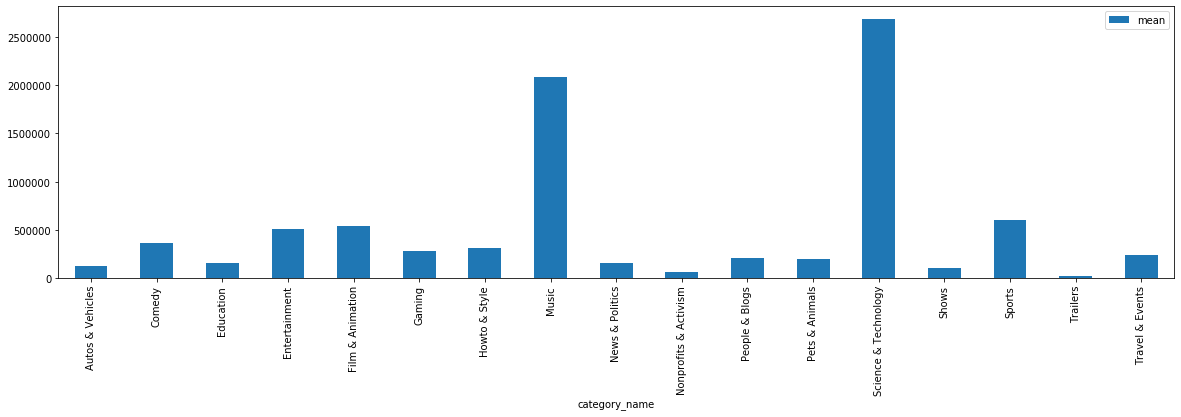

In [51]:
#그래프
KR_cat_mean2 = pd.DataFrame(KR_cat_views['mean'])
KR_cat_mean2.plot.bar()

* Science&Technology와 Music의 동영상이 평균적으로 가장 조회수가 높았다.

In [52]:
#카테고리별 댓글수 평균 분포
KR_cat_comment = KR_with_cat_name.groupby("category_name").comment_count.agg([min,max,np.mean])
print(KR_cat_comment.sort_values(["mean"]))

                       min      max          mean
category_name                                    
Trailers                 1        1      1.000000
Shows                    2     1385    258.206061
Nonprofits & Activism    0     6489    303.746528
Autos & Vehicles         0     3897    337.691667
News & Politics          0    35917    549.022422
Travel & Events          6     6270    555.906250
Education                0    11455    579.380658
People & Blogs           0    69274    598.848498
Howto & Style            0    11154    677.182796
Pets & Animals           1     3017    731.824490
Sports                   0    47234    973.810897
Film & Animation         0    46761   1244.287727
Comedy                   0    48776   1472.893969
Entertainment            0   827771   1934.583920
Gaming                   0   297747   3433.247845
Science & Technology     0   122349   7574.260870
Music                    0  1142274  16739.951233


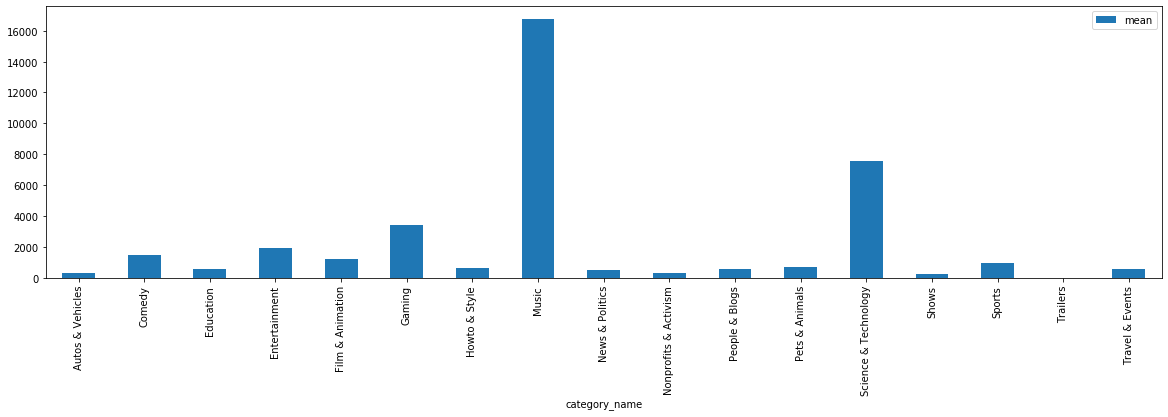

In [53]:
#그래프
KR_cat_mean3 = pd.DataFrame(KR_cat_comment['mean'])
KR_cat_mean3.plot.bar()

* Music과 Science&Technology의 동영상들이 평균 댓글수가 가장 높은것으로 드러났다.

미국

In [54]:
#카테고리별로 그룹화한뒤 count 해보기
US_cat_group = US_with_cat_name.groupby("category_name")
US_cat_group.size()

category_name
Autos & Vehicles          384
Comedy                   3457
Education                1656
Entertainment            9964
Film & Animation         2345
Gaming                    817
Howto & Style            4146
Music                    6472
News & Politics          2487
Nonprofits & Activism      57
People & Blogs           3210
Pets & Animals            920
Science & Technology     2401
Shows                      57
Sports                   2174
Travel & Events           402
dtype: int64

* Entertainment > Music이 가장 많고, Nonprofits&Activism=Shows가 가장 작은 것으로 나타났다.

In [55]:
#카테고리별 좋아요수 평균 분포
US_cat_likes = US_with_cat_name.groupby("category_name").likes.agg([min,max,np.mean])
print(US_cat_likes.sort_values(["mean"]))

                       min      max           mean
category_name                                     
News & Politics          0   163338    7298.364696
Autos & Vehicles         0    97030   11056.395833
Travel & Events          3    42447   12030.462687
Shows                  810    33261   18993.666667
Pets & Animals           6   178243   21055.110870
Education                0   240989   29745.031401
Science & Technology     0   564804   34374.276551
Howto & Style            0   605954   39286.076942
Sports                   0  1121217   45363.942502
Entertainment            0  3093544   53243.325070
People & Blogs           0  2032463   58135.825234
Comedy                   6   865679   62582.223315
Film & Animation         0   922355   70787.836247
Gaming                   2   444203   84502.183599
Music                    0  5613827  218918.199011
Nonprofits & Activism    0  1988746  259923.614035


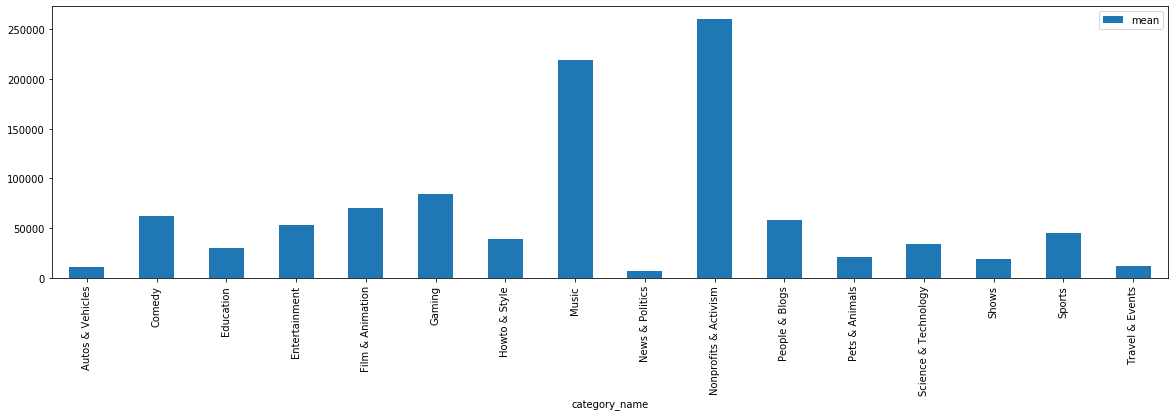

In [56]:
#그래프
US_cat_mean1= pd.DataFrame(US_cat_likes['mean'])
US_cat_mean1.plot.bar()

* Nonprofits&Activism과 Music 동영상의 좋아요수가 가장 높은것을 확인할 수 있다.

In [57]:
#카테고리별 조회수 평균 분포
US_cat_views = US_with_cat_name.groupby("category_name").views.agg([min,max,np.mean])
print(US_cat_views.sort_values(["mean"]))

                         min        max          mean
category_name                                        
News & Politics          549   10277358  5.925877e+05
Education                773    7349435  7.129408e+05
Pets & Animals          3393    6187457  8.311435e+05
Travel & Events          789   23932421  8.546196e+05
Shows                  36609    1445949  9.035273e+05
Howto & Style           1107   54155921  9.837301e+05
Autos & Vehicles        2860   25244097  1.355965e+06
Science & Technology     983   42799458  1.452627e+06
Comedy                  1807   29178096  1.480308e+06
People & Blogs           884   56111957  1.531835e+06
Sports                   658   29090799  2.025969e+06
Entertainment            798  149376127  2.067883e+06
Gaming                  1237   16935442  2.620831e+06
Nonprofits & Activism   1456   24286474  2.963884e+06
Film & Animation         943   54863912  3.106250e+06
Music                   1591  225211923  6.201003e+06


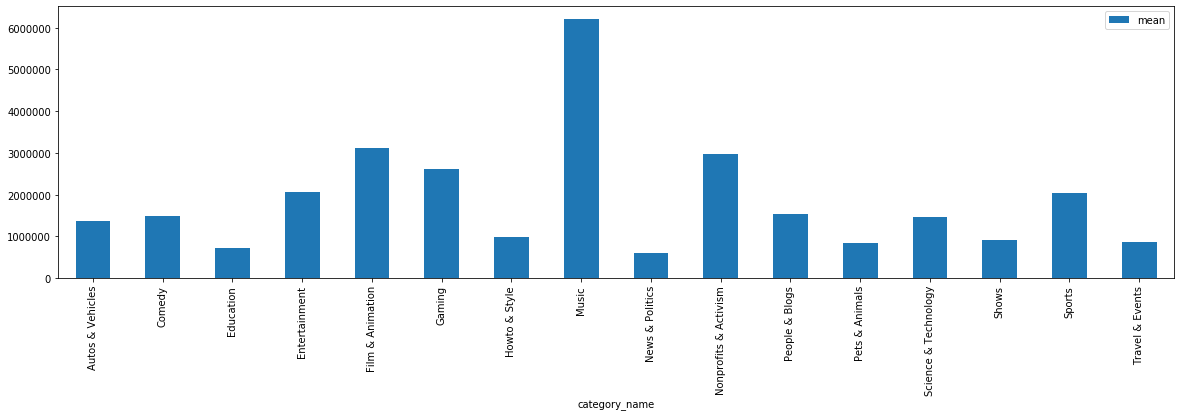

In [58]:
#그래프
US_cat_mean2 = pd.DataFrame(US_cat_views['mean'])
US_cat_mean2.plot.bar()

* Music 영상들의 평균조회수가 가장 높은것을 알 수 있다.

In [59]:
#카테고리별 댓글수 평균 분포
US_cat_comment = US_with_cat_name.groupby("category_name").comment_count.agg([min,max,np.mean])
print(US_cat_comment.sort_values(["mean"]))

                       min      max          mean
category_name                                    
Shows                  220     2181   1668.719298
Autos & Vehicles         0    10591   2042.830729
Travel & Events          0    13631   2267.440299
News & Politics          0    38936   2428.400885
Pets & Animals           0    44063   2892.070652
Education                0    28835   3286.378019
Science & Technology     0   180913   4993.721783
Sports                   0    83660   5148.185373
Howto & Style            0   203884   5583.586589
Comedy                   0    81051   6521.718831
Entertainment            0  1361580   7383.229426
Film & Animation         0   108849   7627.744136
People & Blogs           0   383762   7719.013084
Gaming                   0   144795  18042.488372
Music                    0  1228655  19359.764524
Nonprofits & Activism    0   658130  84364.859649


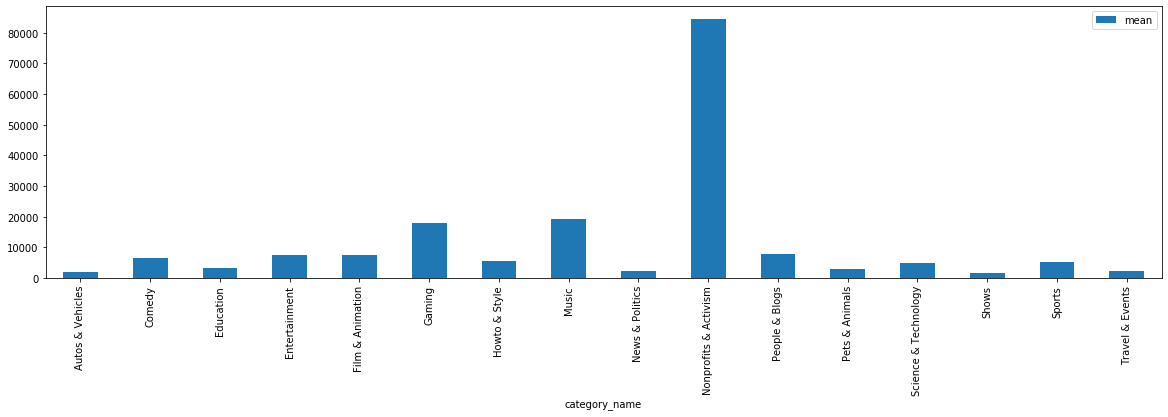

In [60]:
#그래프
US_cat_mean3 = pd.DataFrame(US_cat_comment['mean'])
US_cat_mean3.plot.bar()

* Nonprofits&Activism의 평균 댓글수가 가장 많은것을 알 수 있다.

3-2. 인기 영상에 가장 많이 진입한 카테고리

In [61]:
# 한국
KR_popular_cat = KR.groupby('category_id').count().sort_values('trending_date', ascending=False)
KR_popular_cat['count'] = KR_popular_cat['trending_date']
KR_popular_cat = KR_popular_cat.loc[:,['count']]
KR_popular_cat = KR_popular_cat.sort_values('count', ascending=False)

# top 10
KR_popular_cat_top5 = KR_popular_cat.iloc[:5]
KR_popular_cat_top5

,count
category_id,
24,8955
25,7582
22,7056
1,2200
23,2056


In [62]:
import json

with open('./youtube-new/KR_category_id.json') as KR:
    KR_category = json.load(KR)

<font size=3.8> * 24 - 'Entertainment', 25 - 'News & Politics', 22 - 'People & Blogs', 1 - 'Film & Animation', 23 - 'Comedy' 따라서, 한국의 인기 카테고리 순위는 Entertainment, News & Politics, People & Blogs, Film & Animation, Comedy 순인 것을 알 수 있다.</font>

In [63]:
# 미국
US_popular_cat = US.groupby('category_id').count().sort_values('trending_date', ascending=False)
US_popular_cat['count'] = US_popular_cat['trending_date']
US_popular_cat = US_popular_cat.loc[:,['count']]
US_popular_cat = US_popular_cat.sort_values('count', ascending=False)

# top 10
US_popular_cat_top5 = US_popular_cat.iloc[:5]
US_popular_cat_top5

,count
category_id,
24,9964
10,6472
26,4146
23,3457
22,3210


In [64]:
import json

with open('./youtube-new/US_category_id.json') as US:
    US_category = json.load(US)

<font size=3.8> * 24 - 'Entertainment', 10 - 'Music', 26 - 'Howto & Style', 23 - 'Comedy', 22 - 'People & Blogs' 따라서, 미국의 인기 카테고리 순위는 Entertainment, Music, Howto & Style, Comedy, People & Blogs 순인 것을 알 수 있음.</font>